# Datasets Benchmark

**Summary of this Article** 
- Loading best hyperparameters for each model
- Model training
- Results discussion


## Loading best hyperparameters for each model

TODO... explain that this is the second try.

In [1]:
# Import hyperparameters dataset.
import os 
import pandas as pd

In [2]:
sparse_hyper_params = {}
focused_hyper_params = {}
boolean_hyper_params = {}
for file in os.listdir('hyper_params_results'):
    if file.endswith('.csv') and 'sparse' in file.split('_') and 'classifier' not in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        sparse_hyper_params[file] = df
    elif file.endswith('.csv') and 'focused' in file.split('_') and 'classifier' not in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        focused_hyper_params[file] = df
    elif file.endswith('.csv') and 'classifier' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        boolean_hyper_params[file] = df
print('Sparse hyper params:\n')
for key in sparse_hyper_params.keys():
    print(key, ':\n ',sparse_hyper_params[key])
print('Focused hyper params:\n')
for key in focused_hyper_params.keys():
    print(key, ':\n',focused_hyper_params[key])
print('Boolean hyper params:\n')
for key in boolean_hyper_params.keys():
    print(key, ':\n',boolean_hyper_params[key])

Sparse hyper params:

params_gradient_boost_regression_sparse_max_u.csv :
            params                value
0   n_estimators                   13
1  learning_rate  0.17764936153906563
2           loss        squared_error
3          value   0.5528979104909191
params_gradient_boost_regression_sparse_min_u.csv :
            params                value
0   n_estimators                  151
1  learning_rate  0.10018058609990134
2           loss        squared_error
3          value   0.5607221182696422
params_mlp_regressor_sparse_max_u.csv :
          params                 value
0  hidden_size                    19
1     n_layers                     3
2      dropout    0.4415292238988939
3   activation                  relu
4    optimizer                   sgd
5           lr  0.003549282320247246
6       epochs                    30
7   batch_size                    16
8   classifier                 False
9        value    1.5483470399373407
params_mlp_regressor_sparse_min_u.csv :
 

In [3]:
import ast
def get_hyper_params_from_df(df):
    output = {}
    for row in df.iterrows():
        if row[1]['params'] != 'value':
            try:
                output[row[1]['params']] = ast.literal_eval(row[1]['value'])
            except :
                output[row[1]['params']] = row[1]['value']
    return output
get_hyper_params_from_df(focused_hyper_params['params_mlp_regressor_focused_max_u.csv'])

{'hidden_size': 34,
 'n_layers': 3,
 'dropout': 0.08036356457000618,
 'activation': 'relu',
 'optimizer': 'sgd',
 'lr': 0.0002685191505675321,
 'epochs': 43,
 'batch_size': 64,
 'classifier': False}

## Loading the data

In [4]:
import sys
sys.path.append('..')
from thesis_package import aimodels as my_ai, utils, metrics
from copy import deepcopy
import sklearn.metrics
from sklearn.model_selection import train_test_split

exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])

c:\Users\jamil\Documents\IST\Thesis\new_thesis\code\AI-to-forecast-constraints-in-the-energy-systems\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Regression data sparse
y_max_u_sparse = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_constr.csv').drop(columns=['timestamps'])
y_min_u_sparse = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_constr.csv').drop(columns=['timestamps'])

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_max_u_sparse, test_size=0.2, scaling=True)
data_max_u_sparse = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_min_u_sparse, test_size=0.2, scaling=True)
data_min_u_sparse = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

In [6]:
# Regresison data focused
y_max_u_focused = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_bal_constr.csv')
exogenous_data_focused_max_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_max_bal.csv').drop(columns=['date'])
y_min_u_focused = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_bal_constr.csv')
exogenous_data_focused_min_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_min_bal.csv').drop(columns=['date'])

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_focused_max_u, y_max_u_focused, test_size=0.2, scaling=True)
data_max_u_focused = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_focused_min_u, y_min_u_focused, test_size=0.2, scaling=True)
data_min_u_focused = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

In [7]:
# Classification data
y_max_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_bool_constr.csv').drop(columns=['timestamps'])
y_min_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_bool_constr.csv').drop(columns=['timestamps'])
y_max_u_bool = y_max_u_bool[utils.cols_with_positive_values(y_max_u_bool)]
y_min_u_bool = y_min_u_bool[utils.cols_with_positive_values(y_min_u_bool)]

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_max_u_bool, test_size=0.2, scaling=True)
data_max_u_bool = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_min_u_bool, test_size=0.2, scaling=True)
data_min_u_bool = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

Now for a quick sanity check:

In [8]:
def check_positive_count(reg_data, class_data, threshold, experiment='max_u'):
    print('Positive count in classifiation data', experiment, ':', class_data.sum().sum())
    print('Positive count in regression data', experiment, 'with threshold', threshold, ':', reg_data[reg_data > threshold].count().sum())

def get_threshold(target_data):
    X_train, X_test, y_train, y_test = utils.split_and_suffle(exogenous_data, target_data)
    threshold = y_test.loc[:, y_test.max(axis=0) != 0].max(axis=0).mean() * 0.10
    return threshold
    
check_positive_count(y_max_u_sparse, y_max_u_bool, get_threshold(y_max_u_sparse), experiment='max_u')
check_positive_count(y_min_u_sparse, y_min_u_bool, get_threshold(y_min_u_sparse), experiment='min_u')

Positive count in classifiation data max_u : 22236
Positive count in regression data max_u with threshold 0.001591058368850724 : 22236
Positive count in classifiation data min_u : 35462
Positive count in regression data min_u with threshold 0.0020242378560612192 : 35462


## Training models
In this section the models will be trained with the hyperparameters loaded above. All the models will be stored in the same `Context` object for later evaluation. The `Context` object is a class that stores all the models and their respective hyperparameters. The `Context` object is defined in the `aimodels.py` file. The `Context` object is defined as follows:

In [9]:
models = ['lr', 'gb', 'xgb', 'svr', 'mlp']

### Max Voltage

In [10]:
sparse_hyper_params.keys()

dict_keys(['params_gradient_boost_regression_sparse_max_u.csv', 'params_gradient_boost_regression_sparse_min_u.csv', 'params_mlp_regressor_sparse_max_u.csv', 'params_mlp_regressor_sparse_min_u.csv', 'params_support_vector_regression_sparse_max_u.csv', 'params_support_vector_regression_sparse_min_u.csv', 'params_xgboost_regression_sparse_max_u.csv', 'params_xgboost_regression_sparse_min_u.csv'])

In [11]:
# max_u regression sparse
if 'max_u_regressor_sparse.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u regression sparse')
    # Linear Regression
    regressor_max_u = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_max_u.fit(data=data_max_u_sparse)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_gradient_boost_regression_sparse_max_u.csv'])
    regressor_max_u.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_max_u.fit(data=data_max_u_sparse)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_xgboost_regression_sparse_max_u.csv']) 
    regressor_max_u.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_max_u.fit(data=data_max_u_sparse)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_support_vector_regression_sparse_max_u.csv'])
    regressor_max_u.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_max_u.fit(data=data_max_u_sparse)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_mlp_regressor_sparse_max_u.csv'])
    hyper_params['input_size'] = data_max_u_sparse['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_sparse['y_train'].shape[1]
    regressor_max_u.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u.fit(data=data_max_u_sparse)
    utils.serialize_object('pickles\dataset_benchmark\max_u_regressor_sparse', regressor_max_u)
else:
    print('Loading max_u regression sparse') 
    regressor_max_u = utils.deserialize_object('pickles\dataset_benchmark\max_u_regressor_sparse')

testing_data = {'max_u_regressor_sparse': {}}
for model, strategy in zip(models, regressor_max_u.strategies):
    prediction = strategy.predict(data=data_max_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_max_u_sparse['y_test'].columns)
    testing_data['max_u_regressor_sparse'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_regressor_sparse'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_regressor_sparse'][model]['real'] = deepcopy(data_max_u_sparse['y_test'])

Loading max_u regression sparse


Training max_u regression focused
[16:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learn

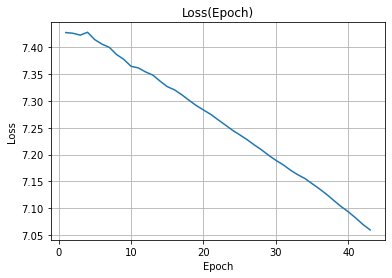

In [12]:
# max_u regression focused
if 'max_u_regressor_focused.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u regression focused')
    # Linear Regression
    regressor_max_u_focused = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_max_u_focused.fit(data=data_max_u_focused)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_gradient_boost_regression_focused_max_u.csv'])
    regressor_max_u_focused.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_focused)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_xgboost_regression_focused_max_u.csv']) 
    regressor_max_u_focused.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_focused)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_support_vector_regression_focused_max_u.csv'])
    regressor_max_u_focused.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_focused)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_mlp_regressor_focused_max_u.csv'])
    hyper_params['input_size'] = data_max_u_focused['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_focused['y_train'].shape[1]
    regressor_max_u_focused.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_focused)
    utils.serialize_object('pickles\dataset_benchmark\max_u_regressor_focused', regressor_max_u_focused)
else: 
    print('Loading max_u regression focused')
    regressor_max_u_focused = utils.deserialize_object('pickles\dataset_benchmark\\max_u_regressor_focused')

testing_data['max_u_regressor_focused'] = {}
for model, strategy in zip(models, regressor_max_u_focused.strategies):
    prediction = strategy.predict(data=data_max_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_max_u_sparse['y_test'].columns)
    testing_data['max_u_regressor_focused'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_regressor_focused'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_regressor_focused'][model]['real'] = deepcopy(data_max_u_sparse['y_test'])

Training max_u classification


c:\Users\jamil\Documents\IST\Thesis\new_thesis\code\AI-to-forecast-constraints-in-the-energy-systems\env\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\Users\jamil\Documents\IST\Thesis\new_thesis\code\AI-to-forecast-constraints-in-the-energy-systems\env\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\Users\jamil\Documents\IST\Thesis\new_thesis\code\AI-to-forecast-constraints-in-the-energy-systems\env\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warn

[16:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

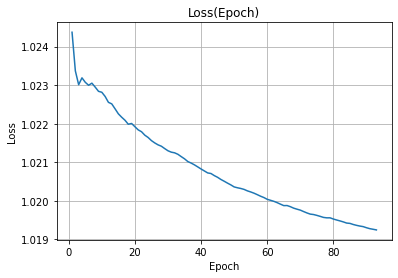

In [13]:
# max_u classification
if 'max_u_classifier.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u classification')
    # Gradient Boost Classifier
    hyper_params = get_hyper_params_from_df(boolean_hyper_params['params_gradient_boost_classifier_max_u.csv'])
    classifier_max_u = my_ai.Context(strategy=my_ai.GradientBoostClassifierStrategy(hyper_params))
    classifier_max_u.fit(data=data_max_u_bool)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(boolean_hyper_params['params_xgboost_classifier_max_u.csv'])
    classifier_max_u.strategy = my_ai.XGBoostClassifierStrategy(hyper_params)
    classifier_max_u.fit(data=data_max_u_bool)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(boolean_hyper_params['params_support_vector_classifier_max_u.csv'])
    classifier_max_u.strategy = my_ai.SupportVectorClassifierStrategy(hyper_params)
    classifier_max_u.fit(data=data_max_u_bool)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(boolean_hyper_params['params_mlp_classifier_max_u.csv'])
    hyper_params['input_size'] = data_max_u_bool['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_bool['y_train'].shape[1]
    regressor_max_u_focused.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_bool)
    utils.serialize_object('pickles\dataset_benchmark\max_u_classifier', classifier_max_u)
else: 
    print('Loading max_u classification')
    classifier_max_u = utils.deserialize_object('pickles\dataset_benchmark\max_u_classifier')

testing_data['max_u_classifier'] = {}
for model, strategy in zip(models, classifier_max_u.strategies):
    prediction = strategy.predict(data=data_max_u_bool)
    prediction = pd.DataFrame(prediction, columns=data_max_u_bool['y_test'].columns)
    testing_data['max_u_classifier'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_classifier'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_classifier'][model]['real'] = deepcopy(data_max_u_bool['y_test'])

### Min u regression training


Training min_u regression sparse


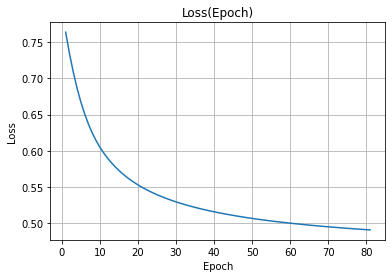

In [16]:
# min_u regression sparse
if 'min_u_regressor_sparse.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u regression sparse')
    # Linear Regression
    regressor_min_u = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_min_u.fit(data=data_min_u_sparse)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_gradient_boost_regression_sparse_min_u.csv'])
    regressor_min_u.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_min_u.fit(data=data_min_u_sparse)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_xgboost_regression_sparse_min_u.csv'])
    regressor_min_u.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_min_u.fit(data=data_min_u_sparse)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_support_vector_regression_sparse_min_u.csv'])
    regressor_min_u.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_min_u.fit(data=data_min_u_sparse)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_mlp_regressor_sparse_min_u.csv'])
    hyper_params['input_size'] = data_min_u_sparse['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_sparse['y_train'].shape[1]
    regressor_max_u_focused.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_min_u_sparse)
    utils.serialize_object('pickles\dataset_benchmark\min_u_regressor_sparse', regressor_min_u)
else:
    print('Loading min_u regression sparse')
    regressor_min_u = utils.deserialize_object('pickles\dataset_benchmark\min_u_regressor_sparse')

testing_data['min_u_regressor_sparse'] = {}
for model, strategy in zip(models, regressor_min_u.strategies):
    prediction = strategy.predict(data=data_min_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_min_u_sparse['y_test'].columns)
    testing_data['min_u_regressor_sparse'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_regressor_sparse'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_regressor_sparse'][model]['real'] = deepcopy(data_min_u_sparse['y_test'])

Training min_u regression focused
[17:13:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:13:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:13:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learn

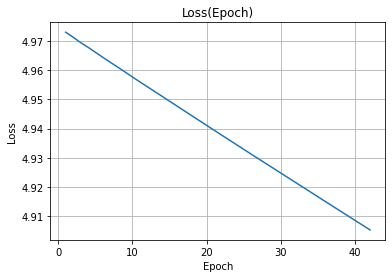

In [17]:
# min_u regression focused
if 'min_u_regressor_focused.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u regression focused')
    # Linear Regression
    regressor_min_u_focused = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_min_u_focused.fit(data=data_min_u_focused)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_gradient_boost_regression_focused_min_u.csv'])
    regressor_min_u_focused.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_min_u_focused.fit(data=data_min_u_focused)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_xgboost_regression_focused_min_u.csv'])
    regressor_min_u_focused.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_min_u_focused.fit(data=data_min_u_focused)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_support_vector_regression_focused_min_u.csv'])
    regressor_min_u_focused.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_min_u_focused.fit(data=data_min_u_focused)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_mlp_regressor_focused_min_u.csv'])
    hyper_params['input_size'] = data_min_u_focused['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_focused['y_train'].shape[1]
    regressor_max_u_focused.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_min_u_focused)
    utils.serialize_object('pickles\dataset_benchmark\min_u_regressor_focused', regressor_min_u_focused)
else:
    print('Loading min_u regression focused')
    regressor_min_u_focused = utils.deserialize_object('pickles\dataset_benchmark\min_u_regressor_focused')

testing_data['min_u_regressor_focused'] = {}
for model, strategy in zip(models, regressor_min_u_focused.strategies):
    prediction = strategy.predict(data=data_min_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_min_u_sparse['y_test'].columns)
    testing_data['min_u_regressor_focused'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_regressor_focused'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_regressor_focused'][model]['real'] = deepcopy(data_min_u_sparse['y_test'])

Training min_u classification


c:\Users\jamil\Documents\IST\Thesis\new_thesis\code\AI-to-forecast-constraints-in-the-energy-systems\env\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\Users\jamil\Documents\IST\Thesis\new_thesis\code\AI-to-forecast-constraints-in-the-energy-systems\env\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\Users\jamil\Documents\IST\Thesis\new_thesis\code\AI-to-forecast-constraints-in-the-energy-systems\env\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warn

[17:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

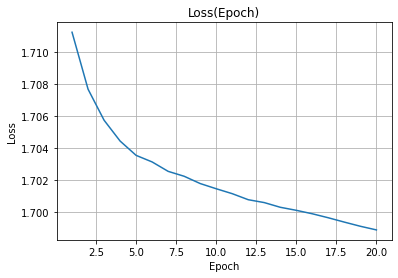

In [18]:
# min_u classification
if 'min_u_classifier.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u classification')
    # Gradient Boost Classifier
    hyper_params = get_hyper_params_from_df(boolean_hyper_params['params_gradient_boost_classifier_max_u.csv'])
    classifier_min_u = my_ai.Context(strategy=my_ai.GradientBoostClassifierStrategy(hyper_params))
    classifier_min_u.fit(data=data_min_u_bool)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(boolean_hyper_params['params_xgboost_classifier_min_u.csv'])
    classifier_min_u.strategy = my_ai.XGBoostClassifierStrategy(hyper_params)
    classifier_min_u.fit(data=data_min_u_bool)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(boolean_hyper_params['params_support_vector_classifier_min_u.csv'])
    classifier_min_u.strategy = my_ai.SupportVectorClassifierStrategy(hyper_params)
    classifier_min_u.fit(data=data_min_u_bool)
    utils.serialize_object('pickles\dataset_benchmark\min_u_classifier', classifier_min_u)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(boolean_hyper_params['params_mlp_classifier_min_u.csv'])
    hyper_params['input_size'] = data_min_u_bool['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_bool['y_train'].shape[1]
    regressor_max_u_focused.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_min_u_bool)
else: 
    print('Loading min_u classification')
    classifier_min_u = utils.deserialize_object('pickles\dataset_benchmark\min_u_classifier')

testing_data['min_u_classifier'] = {}
for model, strategy in zip(models, classifier_min_u.strategies):
    prediction = strategy.predict(data=data_min_u_bool)
    prediction = pd.DataFrame(prediction, columns=data_min_u_bool['y_test'].columns)
    testing_data['min_u_classifier'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_classifier'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_classifier'][model]['real'] = deepcopy(data_min_u_bool['y_test'])

## Results Discussion
In this section the results of the training and testing are presented and compared. The main objectives of this experience is to compare the performance of the regression models in terms of the hybrid metrics confusion matrix and the hybrid metrics rmse. The comparisons will be the following:
- Compare the confusion matrices of the classification models and the regression models evaluate with the hybrid metrics.
- Compare the error results of the regression models trained with the focused dataset and the sparse dataset. 

In [19]:
# Testing all models: Function that receives a dict with the real and predicted values, and outputs a dataframe with the results of the metrics.
# Accumulate all the classifications for each bus.
tp, tn, fp, fn = 0, 0, 0, 0
for bus in testing_data['max_u_classifier']['gb']['predicted'].columns:
    # Compute tp, tn, fp, fn
    tp += sum((testing_data['max_u_classifier']['gb']['predicted'][bus] == 1) & (testing_data['max_u_classifier']['gb']['real'][bus] == 1))
    tn += sum((testing_data['max_u_classifier']['gb']['predicted'][bus] == 0) & (testing_data['max_u_classifier']['gb']['real'][bus] == 0))
    fp += sum((testing_data['max_u_classifier']['gb']['predicted'][bus] == 1) & (testing_data['max_u_classifier']['gb']['real'][bus] == 0))
    fn += sum((testing_data['max_u_classifier']['gb']['predicted'][bus] == 0) & (testing_data['max_u_classifier']['gb']['real'][bus] == 1))
    # try:
    #     _tp, _tn, _fp, _fn = confusion_matrix(testing_data['max_u_classifier']['gb']['real'][bus], testing_data['max_u_classifier']['gb']['predicted'][bus]).ravel()
    #     tp += _tp; tn += _tn; fp += _fp; fn += _fn
    # except: 
    #     print('Problem with bus: ', bus)
print('{} + {} = {} = {}'.format(tp, fn, tp+fn, testing_data['max_u_classifier']['gb']['real'].sum().sum()))


1906 + 3130 = 5036 = 5036.0


In [24]:
# Build a multi-index dataframe with the results of the metrics. The first index is the testing_data.keys(), the second index are the tp, tn, fp, fn, and the columns are the models.
columns = ['tp', 'tn', 'fp', 'fn', '(hybrid)accuracy', '(hybrid)precision', '(hybrid)recall', '(hybrid)f1']
index = pd.MultiIndex.from_product([testing_data.keys(), ['lr', 'gb', 'xgb', 'svr']], names=['experiment', 'class'])
df = pd.DataFrame(index=index, columns=columns)
classifier_experiments =[experiment for experiment in testing_data.keys() if 'classifier' in experiment.split('_')]
regressor_experiments = [experiment for experiment in testing_data.keys() if 'regressor' in experiment.split('_')]
# Classifier experiments
for experiment in classifier_experiments:
    for model in testing_data[experiment].keys():
        for bus in testing_data[experiment][model]['predicted'].columns:
            try:
                tp += sum((testing_data[experiment][model]['predicted'][bus] == 1) & (testing_data[experiment][model]['real'][bus] == 1))
                tn += sum((testing_data[experiment][model]['predicted'][bus] == 0) & (testing_data[experiment][model]['real'][bus] == 0))
                fp += sum((testing_data[experiment][model]['predicted'][bus] == 1) & (testing_data[experiment][model]['real'][bus] == 0))
                fn += sum((testing_data[experiment][model]['predicted'][bus] == 0) & (testing_data[experiment][model]['real'][bus] == 1))
            except: 
                print('In the experiment ', experiment, ' and model ', model, ' there was a problem with bus: ', bus)
                if not testing_data[experiment][model]['real'][bus].any():
                    print('Bus {} has no positive data points. Just ignore the little shit.'.format(bus))    
        df.loc[(experiment, model), 'tp'] = tp
        df.loc[(experiment, model), 'tn'] = tn
        df.loc[(experiment, model), 'fp'] = fp
        df.loc[(experiment, model), 'fn'] = fn
        if (tp + tn + fp + fn) != 0:
            accuracy = (tp + tn ) / (tp + tn + fp + fn)
        else: 
            accuracy = 0
        if (tp + fp) != 0:
            precision = tp / (tp + fp)
        else:
            precision = 0
        if (tp + fn) != 0:
            recall = tp / (tp + fn)
        else:
            recall = 0
        if (precision + recall) != 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0
        df.loc[(experiment, model), '(hybrid)accuracy'] = accuracy
        df.loc[(experiment, model), '(hybrid)precision'] = precision
        df.loc[(experiment, model), '(hybrid)recall'] = recall
        df.loc[(experiment, model), '(hybrid)f1'] = f1
        tp = 0
        tn = 0
        fp = 0
        fn = 0 
# Regressor experiments.
for experiment in regressor_experiments:
    for model in testing_data[experiment].keys():
        test_data = testing_data[experiment][model]['real']
        threshold = test_data.loc[:, test_data.max(axis=0) != 0].max(axis=0).mean() * 0.1 
        hybrid_metrics = metrics.Metrics()
        hybrid_metrics.get_prediction_scores(testing_data[experiment][model]['predicted'], testing_data[experiment][model]['real'], threshold=threshold)
        df.loc[(experiment, model), 'tp'] = hybrid_metrics.true_positives_ctr
        df.loc[(experiment, model), 'tn'] = hybrid_metrics.true_negatives_ctr
        df.loc[(experiment, model), 'fp'] = hybrid_metrics.false_positives_ctr
        df.loc[(experiment, model), 'fn'] = hybrid_metrics.false_negatives_ctr
        df.loc[(experiment, model), '(hybrid)accuracy'] = hybrid_metrics.hybrid_accuracy
        df.loc[(experiment, model), '(hybrid)precision'] = hybrid_metrics.hybrid_precision
        df.loc[(experiment, model), '(hybrid)recall'] = hybrid_metrics.hybrid_recall
        df.loc[(experiment, model), '(hybrid)f1'] = hybrid_metrics.hybrid_f1

In [26]:
df

tp      tn     fp    fn (hybrid)accuracy  \
experiment              class                                               
max_u_regressor_sparse  lr      736  302365    217  4178         0.991394   
                        gb     2956  300543   2039  1958         0.990292   
                        xgb    3433  299312   3270  1481         0.987202   
                        svr    3272  298018   4564  1642         0.981964   
                        mlp    4903  222815  79767    11         0.447775   
max_u_regressor_focused lr     3824  299186   3396  1090         0.965336   
                        gb     4392  251328  51254   522         0.861056   
                        xgb    4589  239447  63135   325         0.836931   
                        svr    4252  277358  25224   662         0.919038   
                        mlp    4518  228455  74127   396         0.829597   
max_u_classifier        lr     2439   83464   1940  2597         0.949834   
                        gb     1906   83260   2144  3130         0.941685   
                        xgb    1516   84934    470  3520         0.955882   
                        svr     NaN     NaN    NaN   NaN              NaN   
                        mlp     NaN     NaN    NaN   NaN              NaN   
min_u_regressor_sparse  lr      932  301454    558  4552         0.987205   
                        gb     4369  296641   5371  1115         0.981985   
                        xgb    3939  297572   4440  1545          0.98377   
                        svr    4764  293962   8050   720          0.97408   
                        mlp     NaN     NaN    NaN   NaN              NaN   
min_u_regressor_focused lr     5429  240971  61041    55         0.844695   
                        gb     5113  259435  42577   371         0.885003   
                        xgb    5174  249903  52109   310         0.865197   
                        svr    5229  269317  32695   255         0.908627   
                        mlp     NaN     NaN    NaN   NaN              NaN   
min_u_classifier        lr     3257   80400   4022  2761            0.925   
                        gb     3723   82270   2152  2295         0.950829   
                        xgb       0   84422      0  6018         0.933459   
                        svr     NaN     NaN    NaN   NaN              NaN   
                        mlp     NaN     NaN    NaN   NaN              NaN   

                              (hybrid)precision (hybrid)recall (hybrid)f1  
experiment              class                                              
max_u_regressor_sparse  lr              0.68233       0.148467   0.243871  
                        gb             0.520878        0.58928   0.552972  
                        xgb            0.457789       0.683091   0.548194  
                        svr            0.318792       0.620103   0.421099  
                        mlp            0.064603       0.999257    0.12136  
max_u_regressor_focused lr             0.522715        0.81896   0.638132  
                        gb             0.071804       0.904144   0.133041  
                        xgb            0.067747       0.943935    0.12642  
                        svr            0.121167       0.866381   0.212601  
                        mlp            0.073693        0.94416   0.136715  
max_u_classifier        lr             0.556976       0.484313   0.518109  
                        gb             0.470617       0.378475   0.419547  
                        xgb            0.763343       0.301033   0.431786  
                        svr                 NaN            NaN        NaN  
                        mlp                 NaN            NaN        NaN  
min_u_regressor_sparse  lr              0.54083       0.151247   0.236387  
                        gb             0.430003       0.805767   0.560755  
                        xgb            0.455714       0.730443   0.561263  
                        svr            0.353947 

In [22]:
# The real values are the same
test = testing_data['max_u_regressor_sparse']['gb']['real'] == testing_data['max_u_regressor_sparse']['lr']['real']

In [30]:
testing_data['classifier'].keys()

KeyError: 'classifier'